In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

(28, 28)
(78468, 14)
The first sample :  [[ 61   9  13  12  12  12  13  19  31  45  70 103 123 143 162 162 162 143
  117  97  64  40  21  13  11  13  21  22]
 [ 54   7  10  12  20  34  48  62  74  83  92 116 131 145 163 162 164 148
  131 115  93  80  65  44  24  21  29  34]
 [ 64  23  46  59  72  87  98 105 105  95  87 103 126 147 166 161 166 152
  128 107  90  91  97  86  66  45  27  15]
 [110  66 106 115 120 128 130 131 100  67  62  67  83 117 158 156 165 134
   87  69  65  64  94 114 109  93  70  38]
 [144  92 124 148 152 141 132 115  84  69  63  57  68 101 143 153 159 104
   66  57  60  60  82 125 133 128 114  93]
 [163 113 149 171 162 148 132  80  59  63  68  65  73 115 142 155 138  82
   67  67  70  70  78 102 133 137 144 131]
 [173 128 158 177 164 153 118  63  51  48  58  71  84 134 155 163 128  82
   70  66  54  52  63  90 140 148 163 167]
 [183 140 158 174 167 156 106  59  43  36  38  55  75 139 166 170 143  99
   60  50  40  46  63  89 145 153 167 178]
 [189 139 147 165 165 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


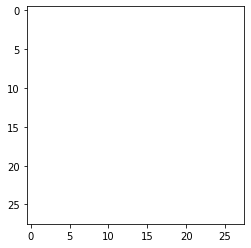

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import time
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 
from sklearn.metrics import accuracy_score, precision_score

x_train = []
x_test = []
# Dummy dataset
data = np.load('/content/drive/MyDrive/Data/chestmnist.npz', allow_pickle=True)
# print(data.files)
# print(data['test_labels'])
x=data['train_images']
y=data['train_labels']

#plt.scatter(x[:, 0], x[:, 1], c=y)
print(x[0].shape)
print(y.shape)
print("The first sample : ", x[0],"belong to cluster", y[0])
print("The tenth sample : ", x[10],"belong to cluster", y[10])


# Split to a train set (80%), and a test set (20%)
x_testPre, y_test = data["test_images"], data["test_labels"]
x_trainPre, y_train = data["train_images"], data["train_labels"]
# plt.gray()
#

img = x_trainPre[5].astype('float32')
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(img)

# for i in range(len(x_train)):
#   x_train[i] = color_img = cv2.cvtColor(x_train[i], cv2.cv.CV_GRAY2RGB)
# plt.imshow(x_train[1], interpolation='nearest')


In [ ]:
#img = x_train[5].astype('float32')\
x_train = []
x_test = []
for i in range(len(x_trainPre)):
  var = cv2.cvtColor(x_trainPre[i],cv2.COLOR_GRAY2RGB)
  var = np.transpose(var, [2, 0, 1])
  x_train.append(var)
for i in range(len(x_testPre)):
  var = cv2.cvtColor(x_testPre[i],cv2.COLOR_GRAY2RGB)
  var = np.transpose(var, [2, 0, 1])
  x_test.append(var)
print(x_train[0].shape)
print(x_test[0].shape)

(3, 28, 28)
(3, 28, 28)


In [ ]:
!ls
print(x_train[500].shape)

chestmnist.npz	drive  model2.pt  model3.pt  model.pt  sample_data
(3, 28, 28)


In [ ]:
net = models.resnet18(pretrained=True).cuda()
net.fc = nn.Linear(512, 14)
print(net)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class MyDataset(Dataset):
  def __init__(self, x, y):
      super().__init__()
      self.x = x
      self.y = y 
  
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

  def __repr__(self):
      return "This is my dataset and it has length {}".format(len(self))

  def __len__(self):
    #assert len(self.x) == len(self.y)
    return len(self.y)

In [ ]:
# Dataloader
my_dataset = MyDataset(x_train,y_train)
print(my_dataset.__getitem__(0)[0].shape)
my_dataloader = DataLoader(my_dataset, batch_size=64, shuffle=True)


# Optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Loss function (cross entropy for classification)
loss_func = nn.BCEWithLogitsLoss()

# Training time !
net.cuda()
net.train() # Put model in training mode

(3, 28, 28)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
net.cuda()
net.train() # Put model in training mode

count = 0
prev_loss = 0
learning_rate = 0.1
for epoch in range(100): # We go over the data ten times
  loss_list = []
  prev_loss = mean
  mean = 0
  sum = 0
  for batch in my_dataloader:
    optimizer.zero_grad()

    # Forward pass 
    inp, labels = batch
    inp = torch.tensor(inp.cuda(), dtype=torch.float32)
    labels = labels.cuda()
    out = net(inp.cuda())
    loss = loss_func(out, labels.float())
    loss_list.append(loss)
    # Backward pass
    loss.backward()
    optimizer.step()
  for i in loss_list:
    sum +=i
  mean = sum/len(loss_list)
  if count >= 3 and mean > prev_loss:
    learning_rate = learning_rate/2
    count = 0
    for g in optimizer.param_groups:
      g['lr'] = learning_rate
  elif mean < prev_loss:
    count+=1
  else:
    count = 0
  print(f"{epoch}: {mean}", end = "")
  print(f", learning rate: {learning_rate}", end = "")
  print(f", count: {count}")




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0: 0.0035071030724793673, learning rate: 0.1, count: 0
1: 0.008172988891601562, learning rate: 0.1, count: 0
2: 0.005914698354899883, learning rate: 0.1, count: 1
3: 0.00472993403673172, learning rate: 0.1, count: 2
4: 0.005165970418602228, learning rate: 0.1, count: 0
5: 0.014243216253817081, learning rate: 0.1, count: 0
6: 0.004403353668749332, learning rate: 0.1, count: 1
7: 0.004969418980181217, learning rate: 0.1, count: 0
8: 0.00526190921664238, learning rate: 0.1, count: 0
9: 0.004152076784521341, learning rate: 0.1, count: 1
10: 0.004254759754985571, learning rate: 0.1, count: 0
11: 0.005995491053909063, learning rate: 0.1, count: 0
12: 0.004730778746306896, learning rate: 0.1, count: 1
13: 0.0054897116497159, learning rate: 0.1, count: 0
14: 0.004483627621084452, learning rate: 0.1, count: 1
15: 0.005414268933236599, learning rate: 0.1, count: 0
16: 0.005147813353687525, learning rate: 0.1, count: 1
17: 0.009701072238385677, learning rate: 0.1, count: 0
18: 0.00518081244081258

In [ ]:
torch.save(net, 'model4.pt')

In [ ]:
cnn = torch.load('model.pt')

In [ ]:
# Test time

net.eval()

# Dataloader
my_dataset = MyDataset(x_test,y_test)
my_dataloader = DataLoader(my_dataset, batch_size=16)

network_answers = []
true_answers = []
for batch in my_dataloader:
  # Forward pass 
  inp, labels = batch
  inp = torch.tensor(inp.cuda(), dtype=torch.float32)
  out = net(inp)
  # print(out)

  # out is batch_size x 2 (one score for each cluster)
  sigmoid_layer = torch.nn.Sigmoid()
  answers = sigmoid_layer(out).cpu().detach().numpy()

  # Recording values

  preds = answers >= 0.5

  network_answers.extend(np.asarray(preds))
  true_answers.extend(labels.data.cpu().numpy())


print(f" Accuracy Score: {accuracy_score(true_answers, network_answers)}")
print(f" Precision Score: {precision_score(true_answers, network_answers, average='micro')}")

# try to test the machine before training, how much is the accuracy ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


 Accuracy Score: 0.44991753220701647
 Precision Score: 0.2575117953811771


[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False False False False False False
 False False]
[False False False False False False False 